In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

folder_path = "/work/hdd/bcxt/yian3/toxic/features/heads"  # Replace with your actual path

file_list = []
# List files with "top_72_heads" in the name and ending in "heads.npy"
matching_files = [
    f for f in os.listdir(folder_path)
    if "top_72_heads" in f and "fold_0" in f and "mistral" not in f and f.endswith("heads.npy")
]

# Print the matching filenames
for f in matching_files:
    file_list.append(f)

In [3]:
# Create pairs of True_ and False_ matching only by the remaining filename
true_files = {f[5:]: f for f in file_list if f.startswith("True_")}
false_files = {f[6:]: f for f in file_list if f.startswith("False_")}

matched_pairs = []
for true_file in true_files.values():
    core = true_file[5:] #.replace("_pns_", "_")
    expected_false = "False_" + core.replace("_pns", "_acc")  # handles suffix-only _pns too
    if expected_false in false_files.values():
        matched_pairs.append((true_file, expected_false))

matched_pairs

[('True_vicuna_13B_toxigen_vicuna_seed_2_top_72_heads_alpha_15.0_fold_0_top_heads.npy',
  'False_vicuna_13B_toxigen_vicuna_seed_2_top_72_heads_alpha_15.0_fold_0_top_heads.npy'),
 ('True_vicuna_13B_toxigen_vicuna_72_0.01_pns_toxigen_vicuna_seed_2_top_72_heads_alpha_15.0_fold_0_top_heads.npy',
  'False_vicuna_13B_toxigen_vicuna_72_0.01_acc_toxigen_vicuna_seed_2_top_72_heads_alpha_15.0_fold_0_top_heads.npy'),
 ('True_llama3_8B_toxigen_vicuna_seed_2_top_72_heads_alpha_15.0_fold_0_top_heads.npy',
  'False_llama3_8B_toxigen_vicuna_seed_2_top_72_heads_alpha_15.0_fold_0_top_heads.npy'),
 ('True_llama3_8B_toxigen_vicuna_72_0.0001_pns_toxigen_vicuna_seed_2_top_72_heads_alpha_15.0_fold_0_top_heads.npy',
  'False_llama3_8B_toxigen_vicuna_72_0.0001_acc_toxigen_vicuna_seed_2_top_72_heads_alpha_15.0_fold_0_top_heads.npy'),
 ('True_vicuna_13B_hate_vicuna_seed_2_top_72_heads_alpha_15.0_fold_0_top_heads.npy',
  'False_vicuna_13B_hate_vicuna_seed_2_top_72_heads_alpha_15.0_fold_0_top_heads.npy'),
 ('True_

In [34]:
path = '/work/hdd/bcxt/yian3/toxic/features/heads'
pns_head_path = f'{path}/{matched_pairs[1][0]}'
origin_head_path = f'{path}/{matched_pairs[1][1]}'

pns_head = np.load(pns_head_path)
origin_head = np.load(origin_head_path)

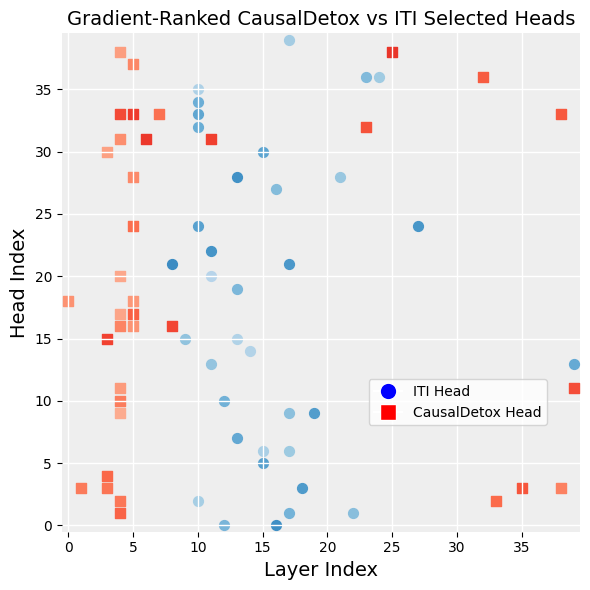

In [35]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Simulate two head selections (ACC and PNS), ranked from most to least important
np.random.seed(0)
# Normalize ranks for colormap
acc_colors = cm.Blues(np.linspace(0.3, 1.0, len(origin_head)))  # light to dark blue
pns_colors = cm.Reds(np.linspace(0.3, 1.0, len(pns_head)))   # light to dark red

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_facecolor('#eeeeee')
fig.patch.set_facecolor('white')
ax.grid(True, which='both', color='white', linewidth=1.0)

# Axis settings
if 'llama' in pns_head_path:
    ax.set_xlim(-0.5, 31.5)
    ax.set_ylim(-0.5, 31.5)  # ✅ Head index from 0 (top) to 39 (bottom)
    ax.set_xticks(np.arange(0, 32, 5))
    ax.set_yticks(np.arange(0, 32, 5))
else:
    ax.set_xlim(-0.5, 39.5)
    ax.set_ylim(-0.5, 39.5)  # ✅ Head index from 0 (top) to 39 (bottom)
    ax.set_xticks(np.arange(0, 40, 5))
    ax.set_yticks(np.arange(0, 40, 5))
    
ax.set_xlabel("Layer Index", fontsize=14)
ax.set_ylabel("Head Index", fontsize=14)
ax.set_title("Gradient-Ranked CausalDetox vs ITI Selected Heads", fontsize=14)

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Plot ACC heads (color gradient from light to dark blue)
for i, (layer, head) in enumerate(origin_head[:36]):
    ax.scatter(layer, head, color=acc_colors[i], marker='o', s=50, label='ITI Head' if i == 0 else "")

# Plot PNS heads (color gradient from light to dark red)
for i, (layer, head) in enumerate(pns_head[:36]):
    ax.scatter(layer, head, color=pns_colors[i], marker='s', s=50, label='CausalDetox Head' if i == 0 else "")

# Simplified legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='ITI Head', markerfacecolor='blue', markersize=12),
    plt.Line2D([0], [0], marker='s', color='w', label='CausalDetox Head', markerfacecolor='red', markersize=12)
]
ax.legend(
    handles=handles,
    loc='lower right',
    bbox_to_anchor=(0.95, 0.2),  # shift slightly inward
    frameon=True,
    fontsize=10
)


plt.tight_layout()
plt.savefig("vicuna_acc_pns_top_36.pdf")
plt.show()
